# ЛР_8(14) Морфологические преобразования

In [177]:
import cv2 as cv2
import numpy as np
import random
from PIL import Image, ImageDraw
from matplotlib import pyplot as plt

In [178]:
def img_input(img_path, size=(0,0), type=1):
    img = cv2.imread(img_path,type)
    if type == 1:
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        if size != (0,0):
            img = cv2.resize(img, size)
            return img
        else:
            return img
    else:
        if size != (0,0):
            img = cv2.resize(img, size)
            return img
        else:
            return img

In [179]:
def img_print(images, titles, row_and_colm=(0,0), hard_type='None'):
    num_of_img = len(images)
    if hard_type == 'None':
        for i in range(num_of_img):
            if row_and_colm == (0,0):
                plt.subplot(1,num_of_img,i+1),plt.imshow(images[i])
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
            else:
                plt.subplot(row_and_colm[0],row_and_colm[1],i+1),plt.imshow(images[i])
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
        plt.show ()

    else:
        for i in range(num_of_img):
            if row_and_colm == (0,0):
                plt.subplot(1,num_of_img,i+1),plt.imshow(images[i], hard_type)
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
            else:
                plt.subplot(row_and_colm[0],row_and_colm[1],i+1),plt.imshow(images[i], hard_type)
                plt.title(titles[i])
                plt.xticks([]),plt.yticks([])
        plt.show ()

### Задание 8.1 Преобразовать изображение с помощью операций дилатация и эрозия.

1) Импортируем выбранное изображение

In [180]:
image = img_input('pic/sun.jpg', type=0)

2) Создадим ядро 5x5

In [181]:
kernel = np.ones((5,5),np.uint8)

3) Выполним функцию дилатации

In [182]:
dilation = cv2.dilate(image,kernel,iterations = 2)

4) Выполним функцию эрозии

In [183]:
erosion = cv2.erode(image, kernel,iterations = 2)

5) Выведем

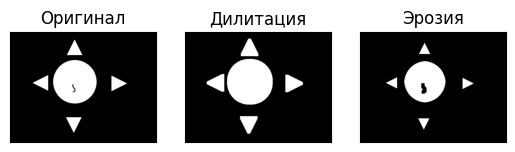

In [184]:
res = [image, dilation, erosion]
title = ['Оригинал', 'Дилитация', 'Эрозия']

img_print(res, title, hard_type='gray')

### Задание 8.2 - 8.3 Создать шумы на изображении типа соль/перец и применить к изображению операции открытия и закрытия

Функция для создания шумов

In [185]:
image = Image.open('pic/sun.jpg')
draw = ImageDraw.Draw(image)
width = image.size[0]
height = image.size[1]
pix = image.load()
for i in range(width):
    for j in range(height):
        rand = random.randint(0, 150)
        a = pix[i, j][0] + rand
        b = pix[i, j][1] + rand
        c = pix[i, j][2] + rand
        if (a > 255):
            a = 255
        if (b > 255):
            b = 255
        if (c > 255):
            c = 255
        draw.point((i, j), (a, b, c))
image.save("pic/median.png", "JPEG")

noise = cv2.imread("pic/median.png", 1)

Разделим прилипшие контуры

In [186]:
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(30,30))

Применим операции открытия и закрытия

In [187]:
opening = cv2.morphologyEx(noise, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(noise, cv2.MORPH_CLOSE, kernel)

Выведем

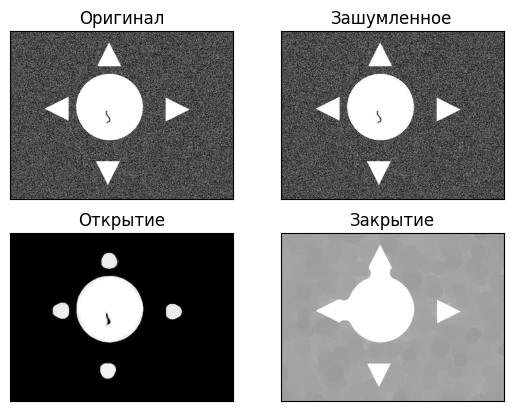

In [188]:
res = [image, noise, opening, closing]
title = ['Оригинал', 'Зашумленное', 'Открытие', 'Закрытие']

img_print(res, title, row_and_colm=(2,2))

### Задание 8.4 Трансформировать цветное изображение в полутоновое при его загрузке. Скопировать полутоновое изображение. К первому изображению применить операцию расширения, ко второму эрозию. Затем вычесть из расширенного изображения изображение после эрозии.

Подготовим изображения

In [189]:
gray_img = img_input('pic/jojo3.jpg', type=0)
copy_image = gray_img.copy()
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5))

Операция расширения

In [190]:
dilated_image = cv2.dilate(gray_img, kernel)

Операция эрозии

In [191]:
eroded_image = cv2.erode(copy_image, kernel)

Вычитание изображения после эрозии из расширенного изображения

In [192]:
result = dilated_image - eroded_image

Выведем результат

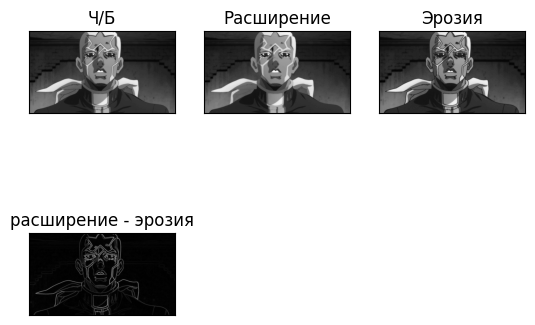

In [193]:
res = [gray_img, dilated_image, eroded_image, result]
title = ['Ч/Б','Расширение','Эрозия','расширение - эрозия']

img_print(res, title, row_and_colm=(2,3), hard_type='gray')

# Задание 8.5 Применить операцию цилиндр к изображению, размер ядра равен 40 + №, № – номер по списку группы.

In [194]:
image = img_input('pic/way.jpg', type=0)

Применим операцию цилиндра

In [195]:
result = cv2.morphologyEx(image, cv2.MORPH_TOPHAT, kernel)

Выведем результат

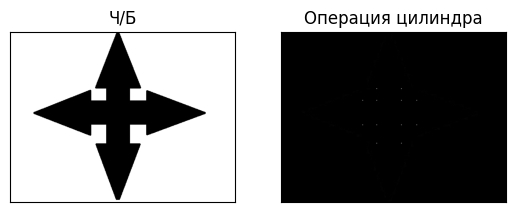

In [196]:
res = [image, result]
title = ['Ч/Б','Операция цилиндра']

img_print(res, title, hard_type='gray')

### Задание 8.6 Применить операцию черная шляпа к изображению, размер ядра равен 40 + №, № – номер по списку группы.

In [197]:
image = img_input('pic/way.jpg', type=0)

Применим операцию цилиндра

In [198]:
result = cv2.morphologyEx(image, cv2.MORPH_BLACKHAT, kernel)

Выведем результат

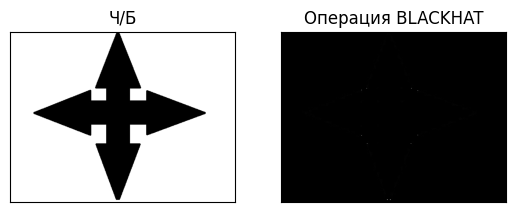

In [199]:
res = [image, result]
title = ['Ч/Б','Операция BLACKHAT']

img_print(res, title, hard_type='gray')

### Задание 8.7. Изготовить ядро, 3x5. Обработать изображение с помощью выбранного ядра и ядра размером 9x9. Сравнить результаты обработки изображения этими ядрами

In [215]:
image = img_input('pic/Cat.jpg', type=0, size=(900,600))

Подготовим ядра

In [216]:
kernel_1 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(30,50))
kernel_2 = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(90,90))

Произведем обработку

In [217]:
result_1 = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel_1)
result_2 = cv2.morphologyEx(image, cv2.MORPH_CLOSE, kernel_2)

Вывод

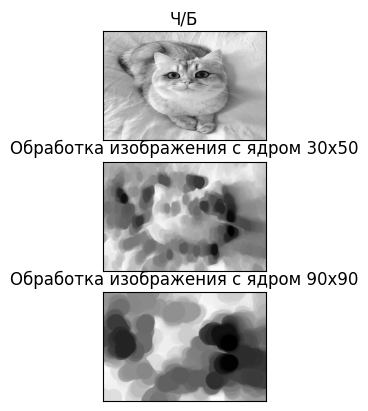

In [219]:
res = [image, result_1, result_2]
title = ['Ч/Б','Обработка изображения с ядром 30x50','Обработка изображения с ядром 90x90']

img_print(res, title, row_and_colm=(3,1), hard_type='gray')